# Regressão Linear e Logística

***

## Índice

1. [Importando bibliotecas](#importando-bibliotecas)
2. [Análise do dataset](#análise-do-dataset)
3. [Treinamento do modelo](#treinamento-do-modelo)
4. [Região de decisão](#região-de-decisão)
5. [Regressão Linear](#regressão-linear)
6. [Referências](#referências)

## Importanto Bibliotecas

In [3]:
# Bibliotecas de manipualção e visualização de dados
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Classes dos modelo
from sklearn.linear_model import LogisticRegression, LinearRegression

# Funções de avaliação dos modelos
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Função para carregar nosso dataset
from sklearn.datasets import load_wine

## Análise do dataset

In [32]:
# vamos carregar o dataset, return_X_y garante que receberemos uma tupla: instâncias, classes. as_frame garante que essas tuplas serão um dataframe fácil de entender
X, y = load_wine(return_X_y=True, as_frame=True)

# algumas perguntas...
print("Quantas classes existem nesse dataset?\n%d" %(len(y.unique())))
print("\nQuantas instâncias existem no dataset?\n%d" %(len(y)))
print("\nQuantas features existem no dataset?\n%d" %(X.shape[1]))
print("\nQue features são essas?\n%s" %(str([k for k in X.keys()])))
print("\nQual o numero de instâncias por classe?")
frequency = np.unique(y.values, return_counts=True)[1]
for c in range(3):
    print("Classe %d: %d" %(c, frequency[c]))
print("\n\nComo esse dataset se parece?\n")


Quantas classes existem nesse dataset?
3

Quantas instâncias existem no dataset?
178

Quantas features existem no dataset?
13

Que features são essas?
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Qual o numero de instâncias por classe?
Classe 0: 59
Classe 1: 71
Classe 2: 48


Como esse dataset se parece?



In [5]:
# vamos olhar para uma pequena parte do dataset
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


Certo. Mas o que cada uma dessas _features_ significa? [1]

**'alcohol'**: Teor alcóolico do vinho.

**'malic_acid'**: Acido málico é um tipo de ácido de forte aroma de maçã e acidez. O vermelho do vinho é acompanhado pelo ácido málico.

**'ash'**: A essência das cinzas é um sal inorgânico, que afeta o sabor geral do vinho e pode dar uma sensação de frescor.

**'alcalinity_of_ash'**: Alcalinidade das cinzas é uma medida da alcalinidade da água.

**'magnesium'**: Magnésio é um elemento essencial para o corpo humano, tem baixa alcalinidade, e pode acelerar o metabolismo.

**'total_phenols'**: Polifenóis são os principais nutrientes no vinho, que são amargas e além de afetar o sabor do vinho, dão coloração e aroma.

**'flavanoids'**: Flavonóides são antioxidantes, ricos em aroma e amargor, benéficos para o coração e tem um efeito anti-idade.

**'nonflavanoid_phenols'**: Fenóis não flavonóides são gases aromáticos especiais, resistenes à oxidação e são levemente ácidos.

**'proanthocyanins'**: Proantocianidina é um polifenol presente nas sementes da uva que são um antioxidante natural com um leve cheiro amargo.

**'color_intensity'**: Intensidade de cor refere-se ao grau de tonalidade da cor. É usado para medir se um vinho é "pesado" ou "leve". Quanto mais tempo o vinho e o suco de uva estiverem em contato durante a produção do vinho, mais pesado é o sabor.

**'hue'**: A matriz representa a vividez da cor e se um vinho tem uma matriz de cor "fria" ou "quente". Pode ser usado para medir a variedade e idade de um vinho. Vinhos tintos mais velhos terão uma coloração mais amarelada e transparente. Intensidade de cor e matriz são indicadores importantes para avaliar a qualidade da aparência de um vinho.

**'od280/od315_of_diluted_wines'**: Medida química de contentração proteica do vinho.

**'proline'**: Prolina é o principal amino ácido presente no vinho tinto, parte importante da nutrição e do sabor do vinho.

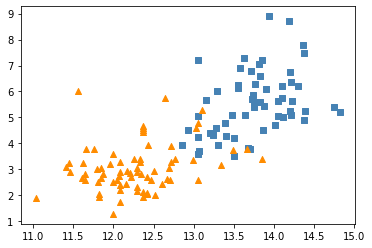

In [6]:
## vamos apenas observador duas classes desse dataset, 0 e 1
class_a = 0
class_b = 1
class_0_instances = (y == class_a)
class_1_instances = (y == class_b)

filtered_y = y[class_0_instances | class_1_instances]
filtered_X = X[class_0_instances | class_1_instances]

# vamos definir cores e simbolos para nossas classses
colors = {0: "steelblue", 1: "darkorange", 2: "mediumseagreen"}
markers = {0: "s", 1: "^", 2:"o"}

# como duas classes estão distribuidas por duas features?
feature_0 = "alcohol"
feature_1 = "color_intensity"

# vamos observar cada uma das classes usando duas features
plt.scatter(
    X[feature_0][class_0_instances],
    X[feature_1][class_0_instances], 
    c=colors[class_a], 
    marker=markers[class_a]
)
plt.scatter(
    X[feature_0][class_1_instances], 
    X[feature_1][class_1_instances], 
    c=colors[class_b], 
    marker=markers[class_b]
)

## Treinamento do modelo

In [7]:
# para treinar e avaliar um classificador, precisamos dividir o dataset em dois conjuntos, ...
X_train, X_test, y_train, y_test = train_test_split(filtered_X[[feature_0, feature_1]], filtered_y, test_size=0.3, random_state=199)

# ... referenciar e treinar o modelo
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
# qual o resultado para esse classificador?
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.64      0.72        14
           1       0.82      0.92      0.87        25

    accuracy                           0.82        39
   macro avg       0.82      0.78      0.79        39
weighted avg       0.82      0.82      0.81        39



## Região de decisão

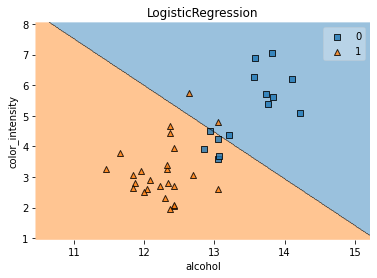

In [9]:
# vamos criar uma função que nos ajude a observar a região de decisão do classificador
def show_decision_region(x, y, clf, f0, f1):
    plot_decision_regions(x, y, clf=clf)
    plt.xlabel(f0)
    plt.ylabel(f1)
    plt.title(clf.__class__.__name__)
    plt.show()

show_decision_region(
    np.array(
        [
            X_test[feature_0].values, 
            X_test[feature_1].values,
        ]
    ).T, 
    y_test.values, 
    model, 
    feature_0, 
    feature_1
)

In [10]:
# como o classificador se comporta com três classes?
X_train, X_test, y_train, y_test = train_test_split(X[[feature_0, feature_1]], y, test_size=0.3, random_state=199)
model = LogisticRegression()
model.fit(X_train, y_train)

# quais os resultados para esse classificador?
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82        18
           1       0.88      0.96      0.92        24
           2       0.86      0.50      0.63        12

    accuracy                           0.83        54
   macro avg       0.83      0.78      0.79        54
weighted avg       0.84      0.83      0.82        54



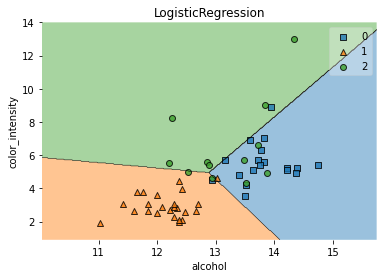

In [11]:
show_decision_region(
    np.stack(
        [
            X_test[feature_0].values, 
            X_test[feature_1].values,
        ],
        axis=1
    ), 
    y_test.values, 
    model, 
    feature_0, 
    feature_1
)

Como é possível um classificador linear classificar três classes?

## Regressão Linear

A regressão linear funciona de forma similar à regressão logística. Entretanto, é um modelo de regressão, e não de classificação. Com ela, podemos relacionar duas variáveis a partir de uma equação linear. Vamos desconsiderar as classes no nosso dataset de vinhos e relacionar as features _alcohol_ e _color_intensity_.

Lembrando da fómula da equação linear: $y = a \times x  + b$

In [33]:
# vamos apenas escolher duas features, uma para ser o x, outra para ser o y da nossa regressão
feature_0 = "alcohol"
feature_1 = "color_intensity"

X_train, X_test, y_train, y_test = train_test_split(filtered_X[[feature_0]].values, filtered_X[[feature_1]].values, test_size=0.3, random_state=199)

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)


LinearRegression()

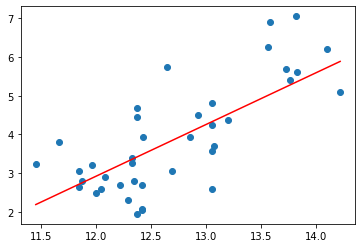

In [17]:
# vamos definir uma simples função para plotar a reta
def plot_regression_line(x, model):
    a = model.coef_[0] # coef_ é o coeficiente da reta (a)
    b = model.intercept_[0] # intercept_ é o termo independente (b)
    x = np.linspace(x.min(), x.max(), 50)
    plt.plot(x, a*x+b, linestyle='-', color="r")

plot_regression_line(X_test, regression_model)

plt.scatter(X_test, y_test)

## Referências

[1] [Identification of red wine categories based on physicochemical properties. Bai, Xueting and Wang, Lingbo and Li, Hanning. International Conference on Education Technology, Management and Humanities Science (ETMHS 2019)](https://www.webofproceedings.org/proceedings_series/ESSP/ETMHS%202019/ETMHS19309.pdf)